# Adding Smoke

#### Code for saving processed images

In [35]:
import os
import cv2

# Function to process images
def process_images(base_img_path, white_img_path, black_img_path, output_folder):
    # Load base image
    base_img = cv2.imread(base_img_path)
    base_img = cv2.cvtColor(base_img, cv2.COLOR_BGR2RGB)

    # Load white overlay image and resize
    white = cv2.imread(white_img_path)
    white = cv2.cvtColor(white, cv2.COLOR_BGR2RGB)
    white = cv2.resize(white, (base_img.shape[1], base_img.shape[0]))

    # Load black overlay image and resize
    black = cv2.imread(black_img_path)
    black = cv2.cvtColor(black, cv2.COLOR_BGR2RGB)
    black = cv2.resize(black, (base_img.shape[1], base_img.shape[0]))

    # Overlay white on base image
    result_white = cv2.addWeighted(base_img, 0.5, white, 0.6, 0)

    # Overlay black on base image
    result_black = cv2.addWeighted(base_img, 0.5, black, 0.9, 0)

    # Save processed images to the specified output folder
    base_name = os.path.splitext(os.path.basename(base_img_path))[0]
    cv2.imwrite(os.path.join(output_folder, f'{base_name}_smoke_white.jpg'), cv2.cvtColor(result_white, cv2.COLOR_RGB2BGR))
    cv2.imwrite(os.path.join(output_folder, f'{base_name}_smoke_black.jpg'), cv2.cvtColor(result_black, cv2.COLOR_RGB2BGR))

# Paths to white and black overlay images
white_image_path = 'smoke_white.jpeg'
black_image_path = 'smoke_black.jpg'

# Root folder containing subfolders
base_image_folder = 'House_Room_Dataset'

# Output folder for processed images
output_folder = 'House_Room_Dataset_processed'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Traverse subfolders and process each image
for subdir, _, files in os.walk(base_image_folder):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            base_img_path = os.path.join(subdir, file)
            relative_path = os.path.relpath(base_img_path, base_image_folder)
            output_subfolder = os.path.join(output_folder, os.path.dirname(relative_path))
            os.makedirs(output_subfolder, exist_ok=True)
            process_images(base_img_path, white_image_path, black_image_path, output_subfolder)


#### Code for clearing the output folder

In [38]:
# Function to remove images in the output folder
def remove_output_images(output_folder):
    for subdir, _, files in os.walk(output_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                file_path = os.path.join(subdir, file)
                os.remove(file_path)
                print(f"Removed: {file_path}")

# Output folder for processed images
output_folder = 'House_Room_Dataset_processed'

# Remove the output images
#remove_output_images(output_folder)


#### Code for displaying output images 

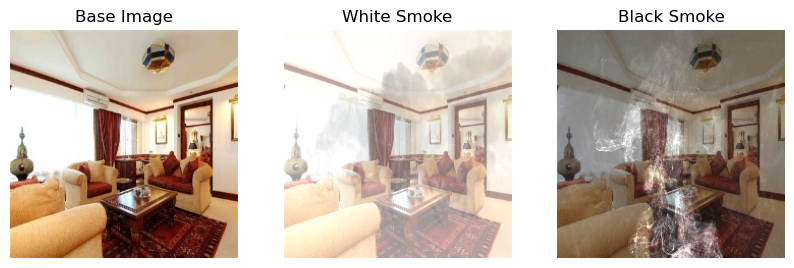

Displayed images for: House_Room_Dataset\Livingroom\living_1159.jpg


In [48]:
import random
import matplotlib.pyplot as plt

# Function to process images
def process_images(base_img_path, white_img_path, black_img_path):
    # Load base image
    base_img = cv2.imread(base_img_path)
    base_img = cv2.cvtColor(base_img, cv2.COLOR_BGR2RGB)

    # Load white overlay image and resize
    white = cv2.imread(white_img_path)
    white = cv2.cvtColor(white, cv2.COLOR_BGR2RGB)
    white = cv2.resize(white, (base_img.shape[1], base_img.shape[0]))

    # Load black overlay image and resize
    black = cv2.imread(black_img_path)
    black = cv2.cvtColor(black, cv2.COLOR_BGR2RGB)
    black = cv2.resize(black, (base_img.shape[1], base_img.shape[0]))

    # Increase the intensity of the white smoke overlay
    result_white = cv2.addWeighted(base_img, 0.5, white, 0.6, 0)

    # Increase the intensity of the black smoke overlay
    result_black = cv2.addWeighted(base_img, 0.5, black, 0.9, 0)

    return base_img,result_white, result_black

# Function to display images
def display_images(images, titles):
    plt.figure(figsize=(10, 5))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Paths to white and black overlay images
white_image_path = 'smoke_white.jpeg'
black_image_path = 'smoke_black.jpg'

# Root folder containing images
base_image_folder = 'House_Room_Dataset'

# Get a list of all image files in the folder and subfolders
image_files = []
for subdir, _, files in os.walk(base_image_folder):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image_files.append(os.path.join(subdir, file))

# Select a random image from the list
random_image_path = random.choice(image_files)

# Process the random image
base_img,result_white, result_black = process_images(random_image_path, white_image_path, black_image_path)

# Display the processed images
display_images([base_img,result_white, result_black], ['Base Image','White Smoke', 'Black Smoke'])

print(f"Displayed images for: {random_image_path}")
